# Practicum 3: Model Development and Tuning

### Question 1 — The DS Problem (0 point)

In your own words, formulate the Data Science problem.


### Question 2 — Prepare the Data (5 pts)

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 


In [3]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

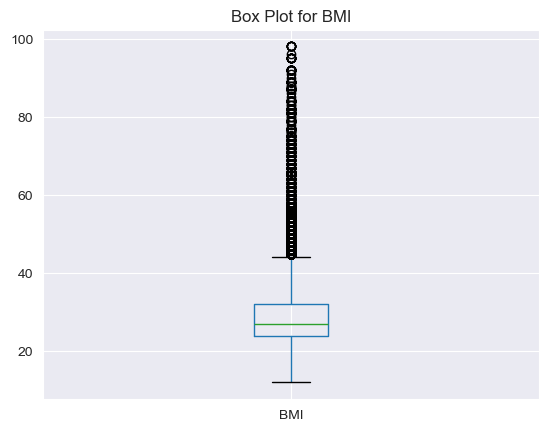

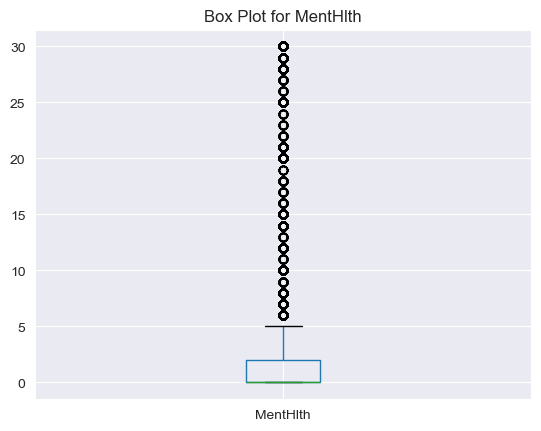

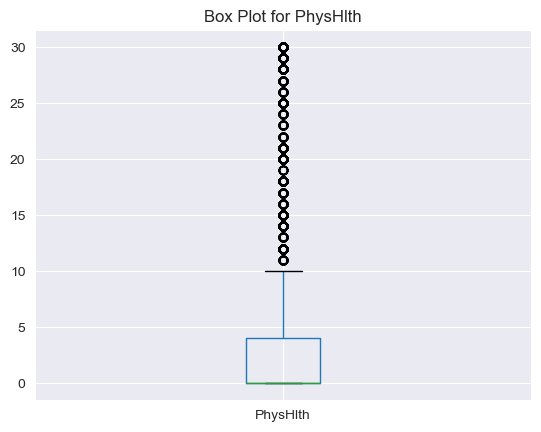

OG dataset shape: (229781, 22)
Filtered dataset shape: (5638, 22)


In [4]:
# Data Cleaning
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(df.head())

# Checking variable types 
print(df.dtypes)

# Dropping NaN and duplicate values
df = df.dropna(axis=0, how='any')
df = df.drop_duplicates()

# Describing data
print(df.describe())

# Continuous variables worth checking
cont = ['BMI', 'MentHlth', 'PhysHlth']

# Box plot for each column
for col in ['BMI', 'MentHlth', 'PhysHlth']:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

# Find outliers
def drop_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_df = df[(df[column] > upper_bound) |  (df[column] < lower_bound)]
    return filtered_df

# Drop outliers
filtered_df = drop_outliers(df, 'MentHlth')
filtered_df = drop_outliers(df, 'PhysHlth')
filtered_df = drop_outliers(df, 'BMI')

print(f"OG dataset shape: {df.shape}")
print(f"Filtered dataset shape: {filtered_df.shape}")

<class 'pandas.core.frame.DataFrame'>


### Question 3 — (20 points)

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.


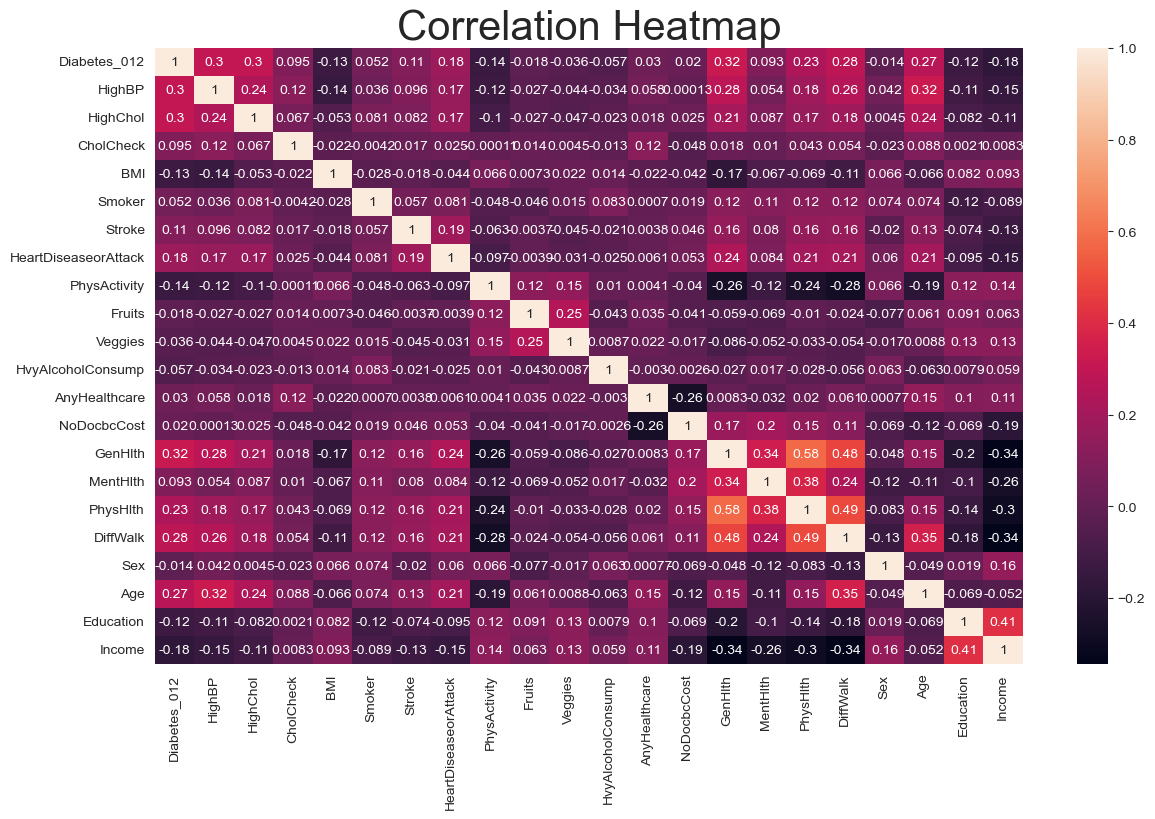

The correlation heatmap reveals significant relationships between various features in the dataset. Diabetes outcomes exhibit moderate positive correlations with BMI, age, and general health, suggesting that higher BMI, older age, and poorer general health are strongly associated with diabetes. Physical activity is negatively correlated with diabetes outcomes, indicating that increased physical activity is linked to a reduced risk of diabetes. Socioeconomic factors like income and education show weaker negative correlations with diabetes outcomes, hinting at being potentially influence.


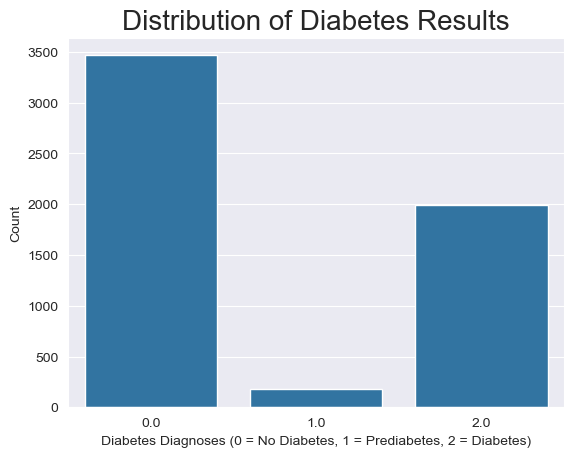

The distribution of diabetes results highlights an imbalanced dataset, with the majority of individuals having no diabetes (0), followed by fewer cases of prediabetes (1) and diabetes (2). This makes sense since the majority of the population, thankfully, does not have diabetes. This skewed distribution reflects the general population trend but also underscores the need for balanced sampling in predictive modeling.


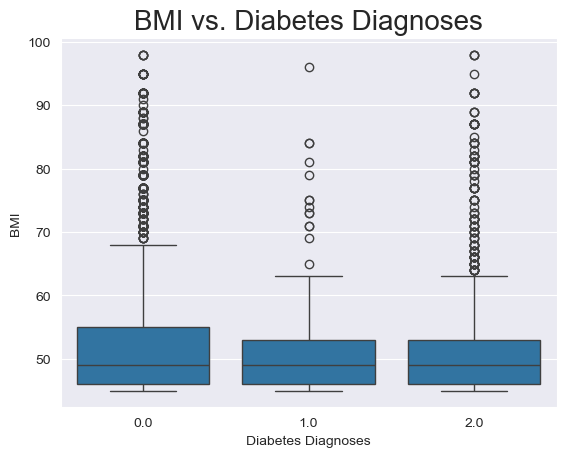

The BMI vs. diabetes diagnoses box plot indicates that median BMI increases as diabetes outcomes progress from 0 (no diabetes) to 2 (diabetes). This suggests that higher BMI is a significant risk factor for diabetes. Additionally, the wider range of BMI values among individuals with diabetes highlights the variability in how BMI relates to the condition.


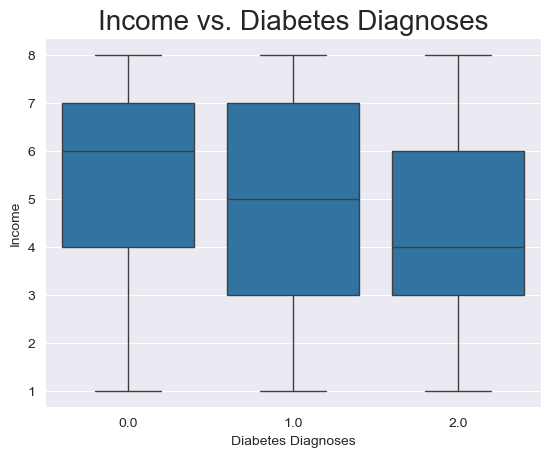

The income vs. diabetes diagnoses box plot shows that people with diabetes (2) tend to have lower median incomes compared to those without diabetes (0). The plot also shows how the range of income levels narrows as diabetes outcomes progress, implying that lower income may be linked to a higher risk of diabetes (potentially due to reduced access to healthcare or healthy lifestyle choices).


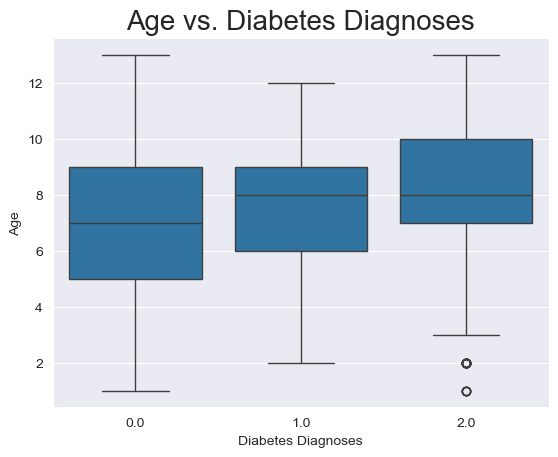

The age vs. diabetes diagnoses box plot visualizes how the median age increases as diabetes diagnoses progress from 0 (no diabetes) to 2 (diabetes), indicating that older individuals are more likely to develop diabetes. Notably, there are a few outliers in the younger age range for those diagnosed with diabetes, emphasizing that while diabetes is more common in older populations, it can still affect younger individuals. This plot highlights the strong influence of age on diabetes risk.


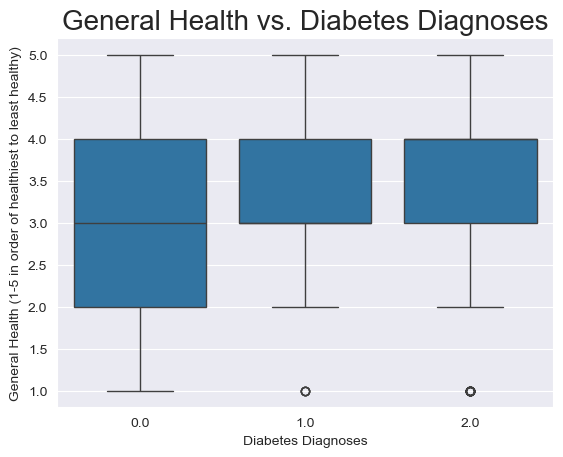

Lastly, the general health vs. diabetes diagnoses box plot illustrates that self-reported general health worsens with the progression of diabetes diagnoses. Those with diabetes (2) report the poorest health, with the highest median scores, reflecting a clear decline in overall health as diabetes advances. This reinforces the strong association between diabetes and deteriorating physical health.


In [20]:
# Exploratory data analysis

# Correlation map 
plt.figure(figsize=(14,8))
correlation_matrix = filtered_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap", size=30)
plt.show()
print("The correlation heatmap reveals significant relationships between various features in the dataset. Diabetes outcomes exhibit moderate positive correlations with BMI, age, and general health, suggesting that higher BMI, older age, and poorer general health are strongly associated with diabetes. Physical activity is negatively correlated with diabetes outcomes, indicating that increased physical activity is linked to a reduced risk of diabetes. Socioeconomic factors like income and education show weaker negative correlations with diabetes outcomes, hinting at being potentially influence.")

# Diabetes Diagnoses distribution
sns.countplot(x="Diabetes_012", data=filtered_df)
plt.title("Distribution of Diabetes Results", size=20)
plt.xlabel("Diabetes Diagnoses (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)")
plt.ylabel("Count")
plt.show()
print("The distribution of diabetes results highlights an imbalanced dataset, with the majority of individuals having no diabetes (0), followed by fewer cases of prediabetes (1) and diabetes (2). This makes sense since the majority of the population, thankfully, does not have diabetes. This skewed distribution reflects the general population trend but also underscores the need for balanced sampling in predictive modeling.")

# BMI vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="BMI", data=filtered_df)
plt.title("BMI vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("BMI")
plt.show()
print("The BMI vs. diabetes diagnoses box plot indicates that median BMI increases as diabetes outcomes progress from 0 (no diabetes) to 2 (diabetes). This suggests that higher BMI is a significant risk factor for diabetes. Additionally, the wider range of BMI values among individuals with diabetes highlights the variability in how BMI relates to the condition.")

# Income vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="Income", data=filtered_df)
plt.title("Income vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("Income")
plt.show()
print("The income vs. diabetes diagnoses box plot shows that people with diabetes (2) tend to have lower median incomes compared to those without diabetes (0). The plot also shows how the range of income levels narrows as diabetes outcomes progress, implying that lower income may be linked to a higher risk of diabetes (potentially due to reduced access to healthcare or healthy lifestyle choices).")

# Age vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="Age", data=filtered_df)
plt.title("Age vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("Age")
plt.show()
print("The age vs. diabetes diagnoses box plot visualizes how the median age increases as diabetes diagnoses progress from 0 (no diabetes) to 2 (diabetes), indicating that older individuals are more likely to develop diabetes. Notably, there are a few outliers in the younger age range for those diagnosed with diabetes, emphasizing that while diabetes is more common in older populations, it can still affect younger individuals. This plot highlights the strong influence of age on diabetes risk.")

# General Health vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="GenHlth", data=filtered_df)
plt.title("General Health vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("General Health (1-5 in order of healthiest to least healthy)")
plt.show()
print("Lastly, the general health vs. diabetes diagnoses box plot illustrates that self-reported general health worsens with the progression of diabetes diagnoses. Those with diabetes (2) report the poorest health, with the highest median scores, reflecting a clear decline in overall health as diabetes advances. This reinforces the strong association between diabetes and deteriorating physical health.")




### Question 4a — (20 points)

Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.


### [Optional] Question 4b — (10 points)
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following
(1) Feature engineering: Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.
OR
(2) Statistical tests: Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

### Question 5 — (5 points)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).


### Question 6 — (30 points)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.


### Question 7 — (15 points)

Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

### Question 8 — (5 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


Note:

Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
Use markdown cells to explain your observations about the data.
Include the names of all teammates on all submissions
Ensure that your Python code is in a code cell and that it executes without errors.